In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from IPython.core.display import display, HTML
import warnings
import time
sns.set()
display(HTML("<style>.container { width:60% !important; }</style>"))  # увеличение ширины ячейки блокнота
warnings.filterwarnings("ignore",category=UserWarning)  # убираем ненужные предупреждение matplotlib

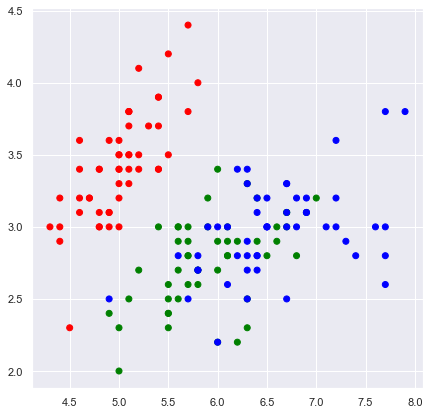

In [2]:
# Загрузка датасета
X, y = load_iris(return_X_y=True)
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [3]:
def e_metrics(x1, x2):
    """
    Функкция подсчета евклидовой метрики
    """
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

def knn(x_train, y_train, x_test, k):
    """
    Алгоритм поиска k ближайших соседей
    """
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

def accuracy(pred, y):
    """
    Функция определения точности
    """
    return (sum(pred == y) / len(y))

def get_graph(X_train, y_train, k):
    """
    Визуализация результатов
    """
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    h = .02
    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

Точность алгоритма при k = 10: 0.967


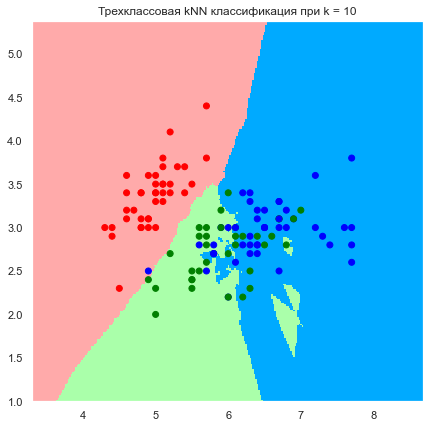

In [4]:
k = 10
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

# 1
К алгоритму kNN реализовать добавление весов для соседей по любому из показанных ранее принципов.

In [5]:
# ближайшим соседям присваиваются бОльшие веса
# можно брать номер соседа (в отсортированном списке расстояний) -- но тогда нужно придумывать веса
# можно брать дистанцию как вес -- тогда возможно будет брать больше соседей

In [6]:
def knnw(x_train, y_train, x_test, k):
    """
    Алгоритм поиска k ближайших соседей с весами
    Вес присваивается в зависимости от расстояния
    """
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        # создаем словарь со всеми возможными классами
        y_classes = {class_item: 0 for class_item in set(y_train)}
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        k_distances = sorted(test_distances)[0:k]
        # --------------------------------- РЕАЛИЗАЦИЯ ВЕСОВ ---------------------------------
        # Суммируем расстояния до k-соседей
        k_total_distance = sum([x[0] for x in k_distances])
        for d in k_distances:
            # увеличиваем не на единицу, а на долю расстояния от всех расстояний k-соседей
            y_classes[d[1]] += d[0] / k_total_distance
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(y_classes, key=y_classes.get)[-1])
    return answers

Точность алгоритма при k = 39: 0.967


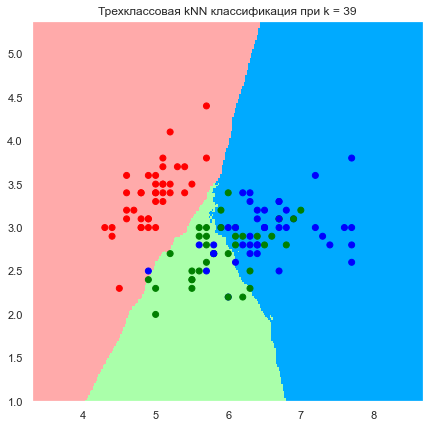

In [7]:
k = 39
y_pred = knnw(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
get_graph(X_train, y_train, k)

Как результат: алгоритм с весами позволяет использовать больше соседей для определения класса без потери эффективности